In [2]:
#getting data from quandl

import quandl
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime

from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.linear_model import LinearRegression

In [3]:
quandl.ApiConfig.api_key = '******'

#getting wiki amazon data
df = quandl.get("WIKI/MSFT")
#only have adjusted close price
df = df[['Adj. Close']]
df

,Adj. Close
Date,
1986-03-13,0.064720
1986-03-14,0.067031
1986-03-17,0.068187
1986-03-18,0.066454
1986-03-19,0.065298
...,...
2018-03-21,92.480000
2018-03-22,89.790000
2018-03-23,87.180000


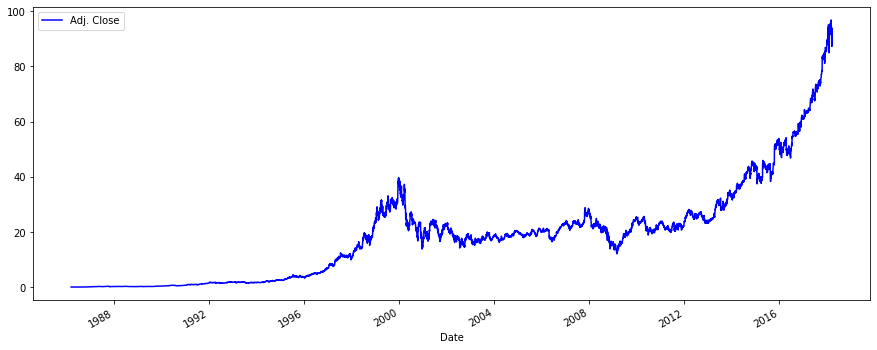

In [4]:
#plot adjusted close price

df['Adj. Close'].plot(figsize=(15,6), color='b')
plt.legend(loc='upper left')
plt.show()

In [5]:
#processed data and created features and labels array 

forecast = 30
df['Prediction'] = df[['Adj. Close']].shift(-forecast)

X = np.array(df.drop(['Prediction'], 1))
X = preprocessing.scale(X)

X_forecast = X[-forecast:]
X = X[:-forecast]

y = np.array(df['Prediction'])
y = y[:-forecast]

In [8]:
#created test and trained data set

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

#fit the model
clf = LinearRegression()
clf.fit(X_train, y_train)

#check accuracy
confidence = clf.score(X_test, y_test)
confidence
#predict values
forecast_predicted = clf.predict(X_forecast)

print(confidence)
forecast_predicted

0.9874933718695482


array([91.97877563, 92.98358644, 94.88042317, 94.20371385, 94.9419422 ,
       93.6808021 , 93.93713139, 96.31586719, 97.71029852, 96.45941159,
       96.01852521, 95.07523343, 95.28029686, 95.88523398, 95.55713249,
       96.11080376, 96.69523453, 98.85865373, 99.09447668, 96.67472819,
       96.10055059, 96.43890525, 96.86953845, 95.11624612, 95.36232223,
       94.69586608, 91.93776294, 89.26168517, 96.02877838, 91.60966145])

(17282.0, 17647.0)

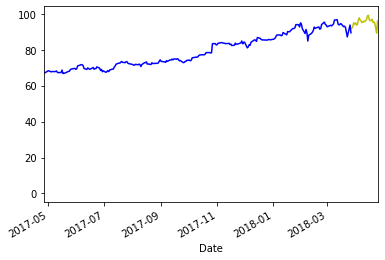

In [7]:
#plot prediction
dates = pd.date_range(start = "2018-03-28", end="2018-04-26")
plt.plot(dates,forecast_predicted, color = 'y')
df['Adj. Close'].plot(color='b')
plt.xlim(xmin=datetime.date(2017,4,26), xmax=datetime.date(2018,4,26))